# Análisis Avanzado de Datos para Marketing

Este informe está dirigido al CEO de la empresa, con el fin de identificar los KPIs más importantes y obtener conclusiones útiles a partir de los datos de usuarios y restaurantes de Chicago. Se presentan al menos 15 visualizaciones detalladas y cada descubrimiento se justifica con explicaciones claras, enfocadas en la toma de decisiones estratégicas.

---

## 1. Importación de librerías necesarias


In [62]:
# Importa la biblioteca Pandas, la herramienta principal para la manipulación y el análisis de datos.
import pandas as pd

# Importa la biblioteca NumPy para operaciones matemáticas y estadísticas de alto rendimiento.
import numpy as np

# Importa la biblioteca Matplotlib para crear gráficos estáticos.
import matplotlib.pyplot as plt

# Importa la biblioteca Seaborn para generar visualizaciones estadísticas más sofisticadas y atractivas.
import seaborn as sns

# Importa las funciones personalizadas 'plot_custom' y 'recomendar_rest' desde un archivo local.
from mega_funcion import plot_custom, recomendar_rest

# --- Configuración de estilo ---

# Establece el estilo de los gráficos de Seaborn en una cuadrícula blanca ('whitegrid').
sns.set(style='whitegrid')

# Ajusta la resolución de los gráficos a 100 puntos por pulgada (DPI) para que se vean más nítidos.
plt.rcParams['figure.dpi'] = 100

## 2. Cargar y explorar datos

A continuación se cargan los datos de usuarios y restaurantes. Se realiza una primera exploración para entender la estructura y calidad de la información.

In [63]:
# --- Cargar y mostrar datos de restaurantes y usuarios ---

# Cargar los dos archivos CSV en DataFrames de pandas.
# 'pd.read_csv()' es la función que lee los datos desde un archivo CSV.
rest = pd.read_csv('Datos_YELP_limpios.csv')
users = pd.read_csv('Datos_usuarios_Chicago_limpios.csv')

# Mostrar las primeras filas de cada DataFrame para una inspección visual inicial.
# 'display(df.head())' es útil en entornos como Jupyter para mostrar DataFrames de forma clara.
print('Primeras filas del DataFrame de usuarios:')
display(users.head())
print('\nPrimeras filas del DataFrame de restaurantes:')
display(rest.head())

# --- Mostrar estadísticas descriptivas ---

# Calcular y mostrar estadísticas descriptivas de ambos DataFrames.
# '.describe(include='all')' proporciona un resumen estadístico completo,
# incluyendo tanto columnas numéricas como categóricas.
print('\nEstadísticas descriptivas de usuarios:')
display(users.describe(include='all'))
print('\nEstadísticas descriptivas de restaurantes:')
display(rest.describe(include='all'))

Primeras filas del DataFrame de usuarios:


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
0,3456521319,Richard Adams,61,Masculino,Chicago,Medio,2,23.02,Sí,1,Vegetariano,0,(394)853-1965,No_aplica,Efectivo,2838.0
1,2916502228,Leah Cooper,44,Femenino,Chicago,Bajo,3,5.07,No,1,Mariscos,0,No_aplica,No_aplica,App,1365.0
2,5736368501,Jennifer Richardson,54,Femenino,Chicago,Alto,5,34.35,No,1,Carnes,1,No_aplica,No_aplica,Tarjeta,7133.0
3,9718391309,Alyssa Bryant,70,Femenino,Chicago,Bajo,1,6.59,No,1,Vegetariano,0,5093254270,No_aplica,Tarjeta,1205.0
4,9148064715,Michael Cochran,79,Masculino,Chicago,Muy Alto,8,78.02,No,1,Pescado,1,No_aplica,No_aplica,App,17625.0



Primeras filas del DataFrame de restaurantes:


,id,alias,aliases,price_num,price_num_imputado,phone,address,rating,review_count,transactions,image_url,url,location.zip_code,coordinates.longitude,coordinates.latitude
0,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,"['newamerican', 'bars', 'bakeries']",3,False,13124926262,809 W Randolph,4.4,10509,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,60607,-87.647946,41.884193
1,boE4Ahsssqic7o5wQLI04w,the-purple-pig-chicago,"['tapasmallplates', 'mediterranean', 'newameri...",3,False,13124641744,444 N Michigan Ave,4.3,8854,"['pickup', 'delivery']",https://s3-media0.fl.yelpcdn.com/bphoto/rHHvhR...,https://www.yelp.com/biz/the-purple-pig-chicag...,60611,-87.624782,41.890694
2,gzhkdb6YoiFm5s3vriG1AA,gretel-chicago,"['cocktailbars', 'newamerican', 'speakeasies']",2,False,17737703427,2833 W Armitage Ave,4.5,415,"['pickup', 'delivery']",https://s3-media0.fl.yelpcdn.com/bphoto/-dxigk...,https://www.yelp.com/biz/gretel-chicago?adjust...,60647,-87.698577,41.917275
3,riT822EnU7y_5eCuJsd9sA,cindys-rooftop-chicago,"['newamerican', 'seafood', 'breakfast_brunch']",2,False,13127923502,12 S Michigan Ave,4.1,2715,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/XLdHyZ...,https://www.yelp.com/biz/cindys-rooftop-chicag...,60603,-87.625006,41.881689
4,GZsrGq6H8CQ4YlGtE_Bm0Q,ciccio-mio-chicago-2,['italian'],3,False,13127963316,226 W Kinzie,4.7,577,['delivery'],https://s3-media0.fl.yelpcdn.com/bphoto/eFIrEM...,https://www.yelp.com/biz/ciccio-mio-chicago-2?...,60654,-87.635240,41.889390



Estadísticas descriptivas de usuarios:


,id_persona,nombre_completo,edad,genero,ciudad_residencia,estrato_socioeconomico,frecuencia_visita,promedio_gasto_comida,ocio,consume_licor,preferencias_alimenticias,membresia_premium,telefono_contacto,correo_electronico,tipo_de_pago_mas_usado,ingresos_mensuales
count,5.123000e+03,5123,5123.000000,5123,5123,5123,5123.000000,5123.000000,5123,5123.000000,5123,5123.000000,5123,5123,5123,5123.000000
unique,NaN,4928,NaN,2,1,4,NaN,NaN,2,NaN,6,NaN,2518,2535,4,NaN
top,NaN,Jonathan Smith,NaN,Masculino,Chicago,Medio,NaN,NaN,No,NaN,Carnes,NaN,No_aplica,No_aplica,Efectivo,NaN
freq,NaN,4,NaN,2590,5123,1798,NaN,NaN,2592,NaN,1767,NaN,2606,2575,2017,NaN
mean,5.522607e+09,NaN,48.658989,NaN,NaN,NaN,4.396643,26.830160,NaN,0.630295,NaN,0.431973,NaN,NaN,NaN,5406.319344
std,2.605582e+09,NaN,18.060893,NaN,NaN,NaN,2.079258,21.795243,NaN,0.482772,NaN,0.495399,NaN,NaN,NaN,4533.683701
min,1.001519e+09,NaN,18.000000,NaN,NaN,NaN,1.000000,5.010000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,801.000000
25%,3.280472e+09,NaN,33.000000,NaN,NaN,NaN,3.000000,9.405000,NaN,0.000000,NaN,0.000000,NaN,NaN,NaN,2037.000000
50%,5.544440e+09,NaN,48.000000,NaN,NaN,NaN,4.000000,20.300000,NaN,1.000000,NaN,0.000000,NaN,NaN,NaN,3376.000000
75%,7.815885e+09,NaN,64.000000,NaN,NaN,NaN,5.000000,36.105000,NaN,1.000000,NaN,1.000000,NaN,NaN,NaN,7662.000000



Estadísticas descriptivas de restaurantes:


,id,alias,aliases,price_num,price_num_imputado,phone,address,rating,review_count,transactions,image_url,url,location.zip_code,coordinates.longitude,coordinates.latitude
count,200,200,200,200.000000,200,2.000000e+02,200,200.000000,200.000000,200,200,200,200.000000,200.000000,200.000000
unique,200,200,173,NaN,2,NaN,197,NaN,NaN,12,200,200,NaN,NaN,NaN
top,qjnpkS8yZO8xcyEIy5OU9A,girl-and-the-goat-chicago,['italian'],NaN,False,NaN,59 W Hubbard St,NaN,NaN,"['pickup', 'delivery']",https://s3-media0.fl.yelpcdn.com/bphoto/ya6gjD...,https://www.yelp.com/biz/girl-and-the-goat-chi...,NaN,NaN,NaN
freq,1,1,9,NaN,134,NaN,2,NaN,NaN,84,1,1,NaN,NaN,NaN
mean,NaN,NaN,NaN,2.460000,NaN,1.449670e+10,NaN,4.401500,876.090000,NaN,NaN,NaN,60624.730000,-87.657499,41.905545
std,NaN,NaN,NaN,0.608483,NaN,4.056311e+09,NaN,0.231768,1620.164432,NaN,NaN,NaN,29.663051,0.028987,0.026011
min,NaN,NaN,NaN,1.000000,NaN,0.000000e+00,NaN,3.800000,4.000000,NaN,NaN,NaN,60302.000000,-87.802095,41.848943
25%,NaN,NaN,NaN,2.000000,NaN,1.312588e+10,NaN,4.300000,101.750000,NaN,NaN,NaN,60611.000000,-87.677499,41.888774
50%,NaN,NaN,NaN,2.000000,NaN,1.312940e+10,NaN,4.400000,307.000000,NaN,NaN,NaN,60622.000000,-87.650453,41.900134
75%,NaN,NaN,NaN,3.000000,NaN,1.773683e+10,NaN,4.500000,838.250000,NaN,NaN,NaN,60647.000000,-87.632185,41.920080


## 3. Visualización de KPIs y Análisis Exploratorio

En esta sección, se presentan los KPIs clave y las visualizaciones que facilitan la comprensión del comportamiento de los usuarios y el rendimiento de los restaurantes. Cada gráfico está acompañado de un análisis detallado e insights valiosos que pueden guiar la estrategia de marketing.


### Gráfico 1: Pairplot de Variables Numéricas de Usuarios

El pairplot ofrece una visualización de las relaciones entre las principales variables numéricas de los usuarios, permitiendo identificar patrones, correlaciones y segmentos clave que podrían ser relevantes para las campañas de marketing.


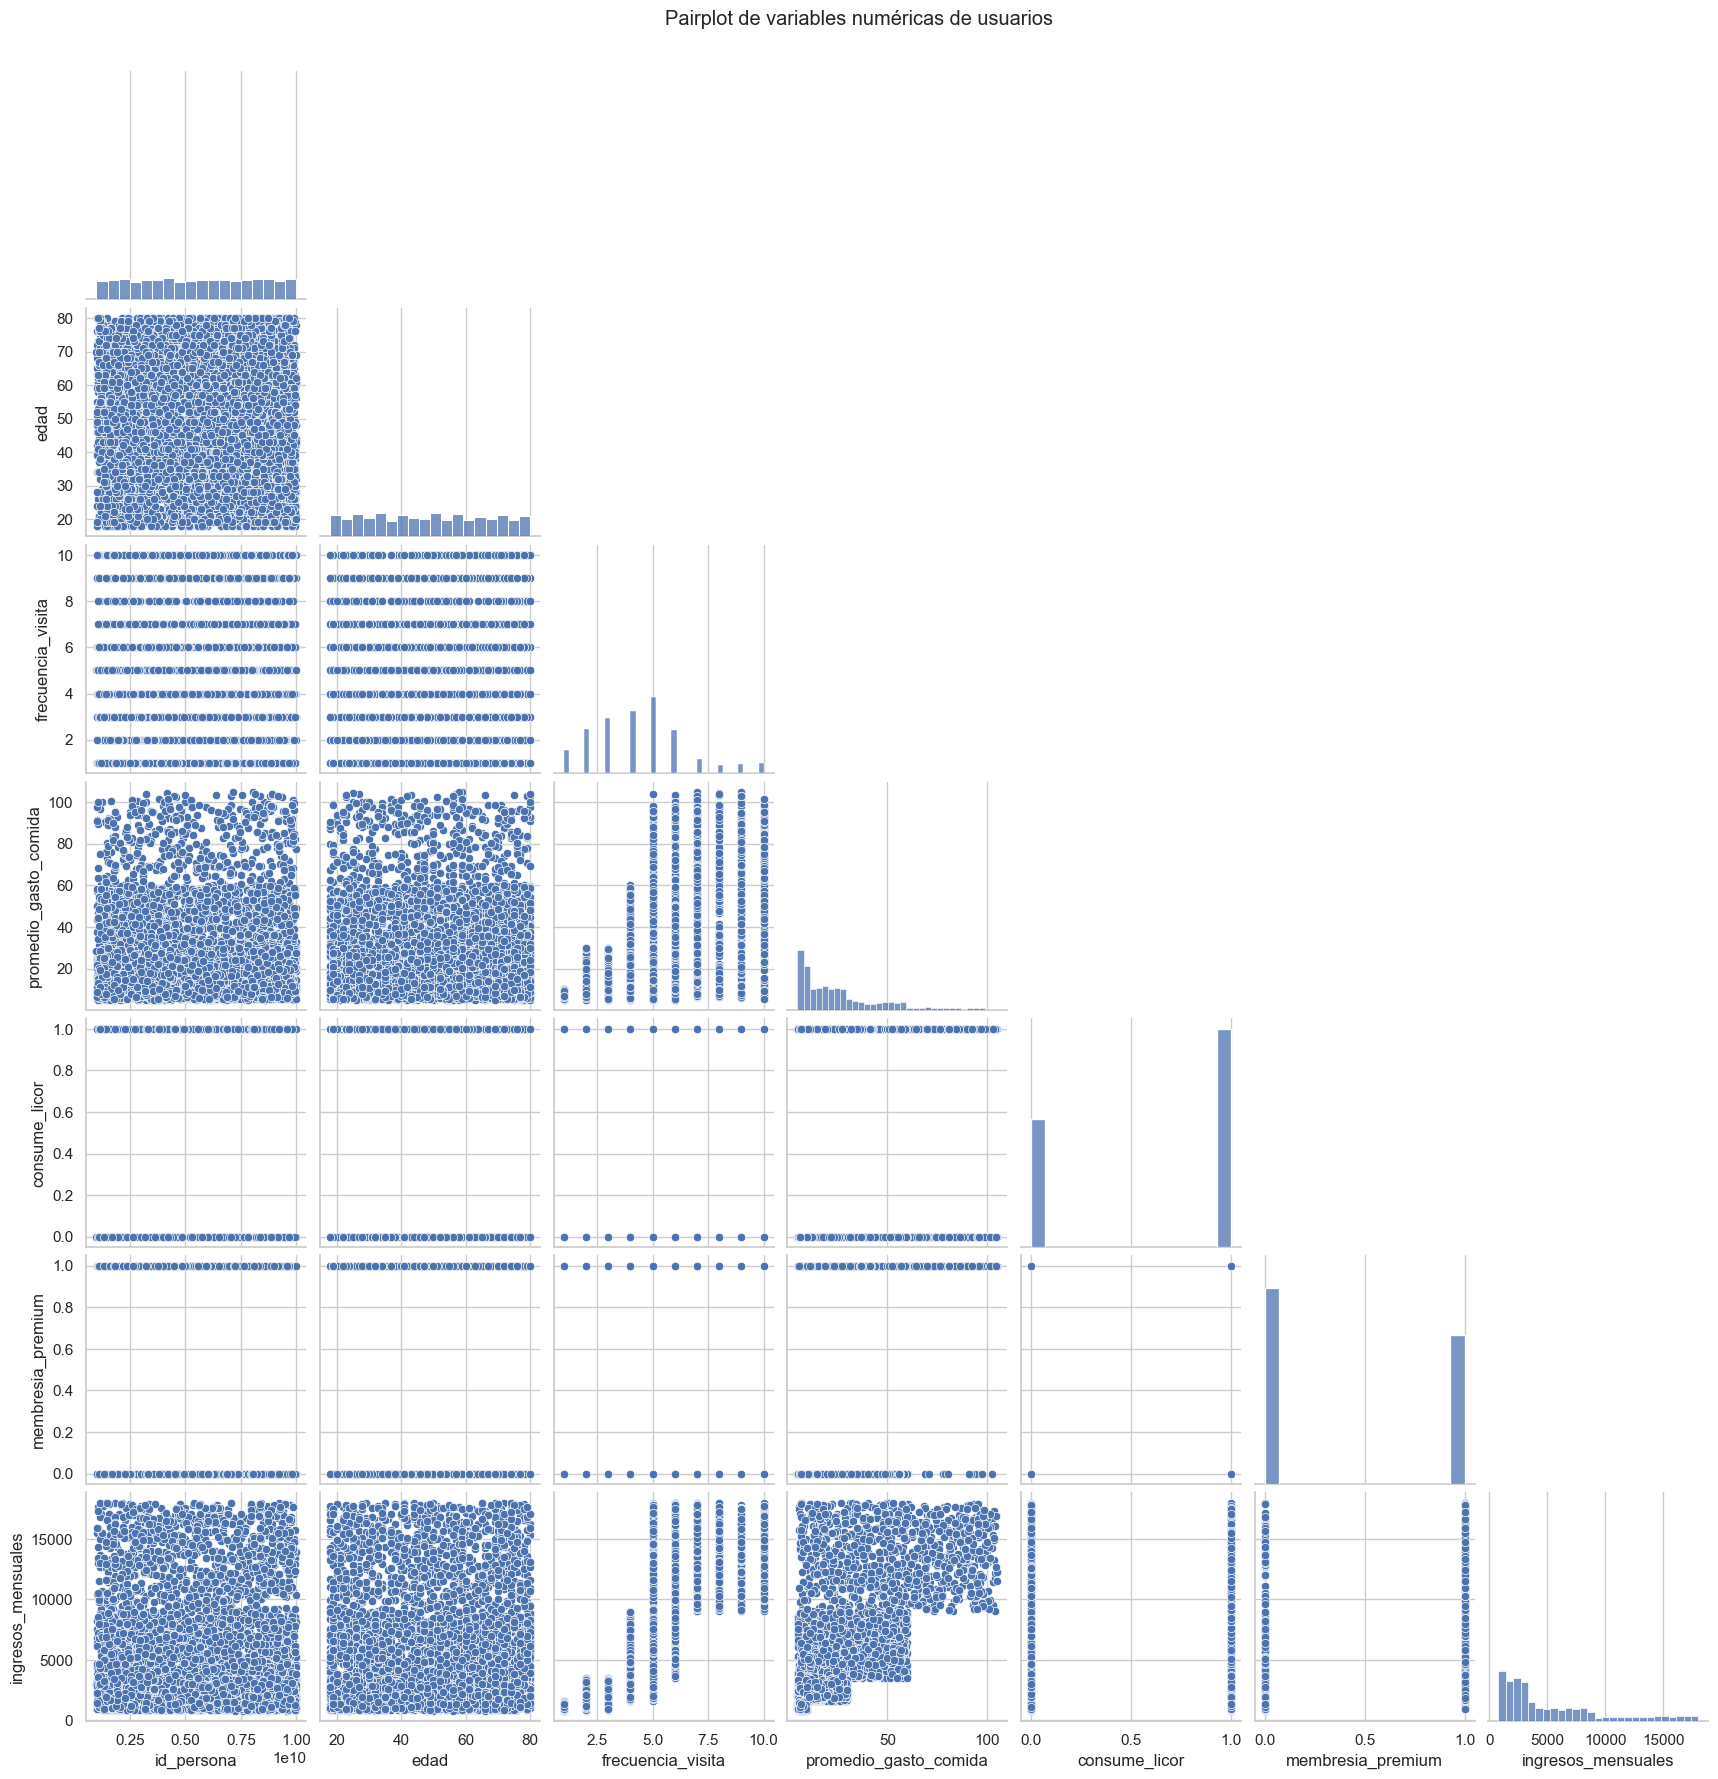

In [64]:
# Muestra un pairplot de las variables numéricas del DataFrame 'users'.
# Este gráfico ayuda a visualizar las relaciones y la distribución de los datos.

# Llama a la función personalizada 'plot_custom'.
# - users: El DataFrame de usuarios que contiene las variables a graficar.
# - tipo='pairplot': Le indica a la función que debe generar un pairplot.
# - title='Pairplot de variables numéricas de usuarios': Asigna un título al gráfico para su clara identificación.
plot_custom(users, tipo='pairplot', title='Pairplot de variables numéricas de usuarios')

### Gráfico 2: Boxplot de Edad de Usuarios

El boxplot de edad facilita la identificación de la mediana, los cuartiles y posibles valores atípicos en la distribución de edades de los usuarios. Esta información es útil para segmentar campañas de marketing basadas en grupos etarios predominantes y descubrir nichos de mercado.


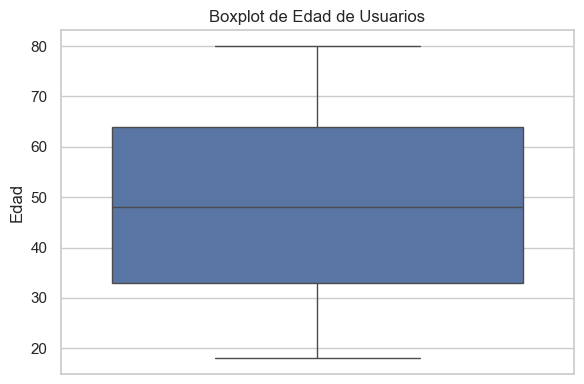

In [65]:
# Muestra un boxplot de la edad de los usuarios.
# Este gráfico ayuda a visualizar la distribución de la edad y a identificar valores atípicos.

# Llama a la función personalizada 'plot_custom'.
# - users: El DataFrame de usuarios que contiene los datos a graficar.
# - tipo='box': Le indica a la función que debe generar un diagrama de caja.
# - y='edad': La columna que se usará para el eje Y.
# - palette=None: Desactiva la paleta de colores, ya que es un gráfico de una sola variable.
# - title: Asigna un título al gráfico para su clara identificación.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='box', y='edad', palette=None, title='Boxplot de Edad de Usuarios', xlabel='', ylabel='Edad', figsize=(6,4))

### Gráfico 3: Histograma de Edad de Usuarios

El histograma de edad muestra la distribución de los usuarios según rangos etarios, permitiendo identificar los grupos con mayor concentración y posibles oportunidades para campañas de marketing segmentadas.


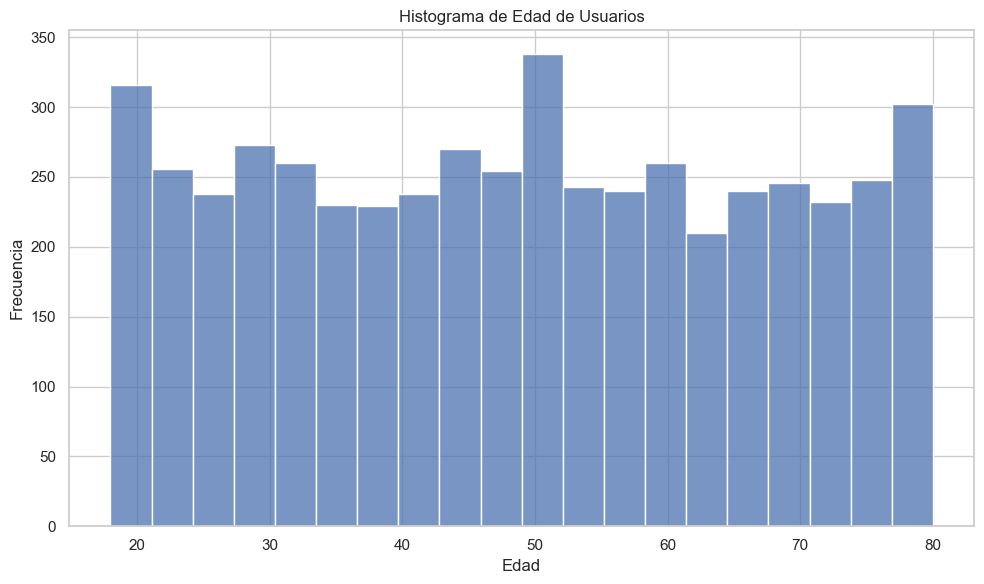

In [66]:
# Muestra un histograma de la edad de los usuarios.
# Este gráfico ayuda a visualizar la distribución de la edad y a identificar la frecuencia de cada rango de edad.

# Llama a la función personalizada 'plot_custom'.
# - users: El DataFrame que contiene los datos a graficar.
# - tipo='hist': Le indica a la función que debe generar un histograma.
# - x='edad': La columna que se usará para el eje X.
# - bins=20: Divide los datos en 20 barras.
# - palette=None: Desactiva la paleta de colores.
# - title: Asigna un título al gráfico.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='hist', x='edad', bins=20, palette=None, title='Histograma de Edad de Usuarios', xlabel='Edad', ylabel='Frecuencia', figsize=(10,6))

### Gráfico 4: Boxplot de Promedio de Gasto en Comida

Este boxplot ayuda a identificar la mediana, la dispersión y los valores atípicos en el gasto promedio en comida de los usuarios. Esta información es crucial para definir estrategias de precios y promociones adaptadas al poder adquisitivo de los clientes.


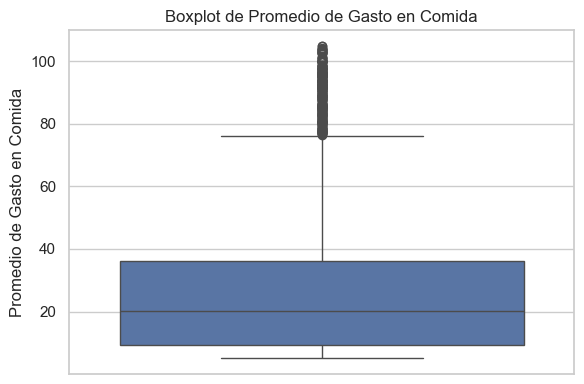

In [67]:
# Muestra un boxplot de la columna 'promedio_gasto_comida'.
# Este gráfico es útil para visualizar la mediana, la dispersión y los valores atípicos.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - users: El DataFrame que contiene los datos.
# - tipo='box': Indica que se debe crear un diagrama de caja.
# - y='promedio_gasto_comida': La columna a analizar, que se mostrará en el eje Y.
# - palette=None: No aplica un esquema de colores, ya que es una variable única.
# - title: Asigna un título descriptivo al gráfico.
# - xlabel: Etiqueta el eje X (en este caso, se deja vacío).
# - ylabel: Etiqueta el eje Y para mayor claridad.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='box', y='promedio_gasto_comida', palette=None, title='Boxplot de Promedio de Gasto en Comida', xlabel='', ylabel='Promedio de Gasto en Comida', figsize=(6,4))

### Gráfico 5: Histograma de promedio de gasto en comida

El histograma muestra la distribución del gasto promedio en comida, permitiendo identificar los rangos de gasto más frecuentes y posibles segmentos premium o económicos para campañas diferenciadas.

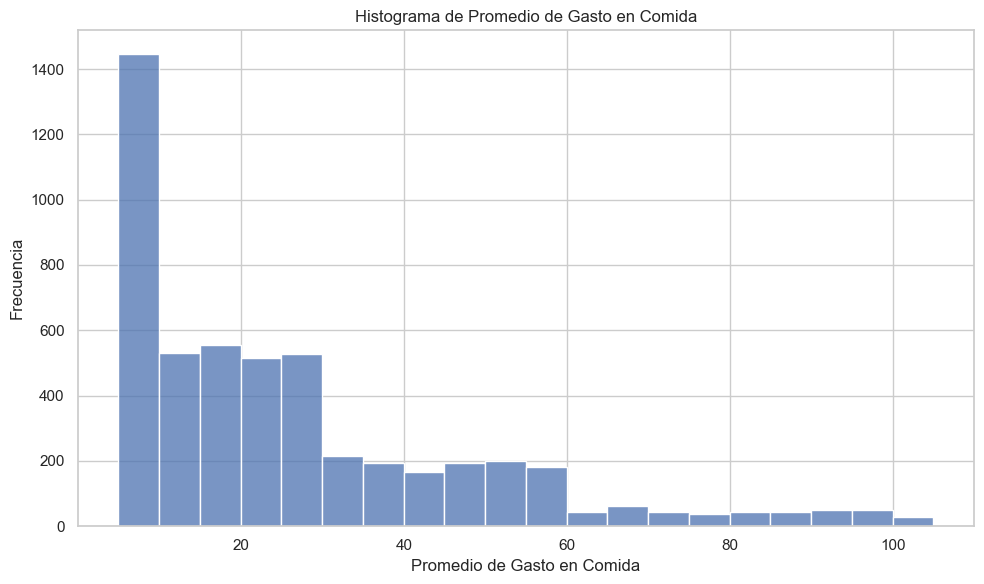

In [68]:
# Muestra un histograma del gasto promedio en comida de los usuarios.
# Este gráfico ayuda a visualizar la distribución del gasto y a identificar los rangos más frecuentes.

# Llama a la función personalizada 'plot_custom'.
# - users: El DataFrame que contiene los datos.
# - tipo='hist': Le indica que debe generar un histograma.
# - x='promedio_gasto_comida': La columna de gasto que se usará para el eje X.
# - bins=20: Divide los datos en 20 rangos para las barras del histograma.
# - palette=None: Desactiva la paleta de colores.
# - title: Asigna un título al gráfico.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='hist', x='promedio_gasto_comida', bins=20, palette=None, title='Histograma de Promedio de Gasto en Comida', xlabel='Promedio de Gasto en Comida', ylabel='Frecuencia', figsize=(10,6))

### Gráfico 6: Boxplot de Gasto Total de Usuarios

Este boxplot permite analizar la dispersión y los valores extremos en el gasto total de los usuarios, ayudando a identificar clientes de alto valor y descubrir oportunidades para implementar programas de fidelización.


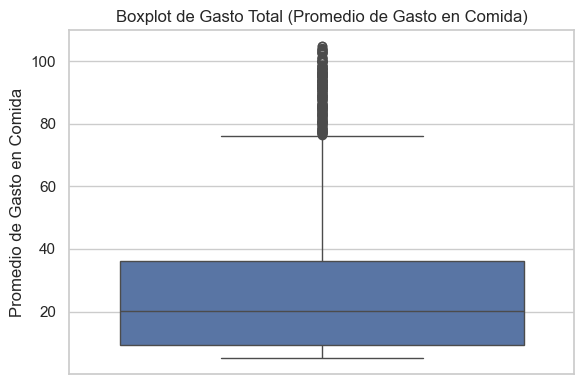

In [69]:
# Muestra un boxplot de la columna 'promedio_gasto_comida'.
# Este gráfico es útil para visualizar la mediana, la dispersión y los valores atípicos.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - users: El DataFrame que contiene los datos.
# - tipo='box': Indica que se debe crear un diagrama de caja.
# - y='promedio_gasto_comida': La columna a analizar, que se mostrará en el eje Y.
# - palette=None: No aplica un esquema de colores, ya que es una variable única.
# - title: Asigna un título descriptivo al gráfico.
# - xlabel: Etiqueta el eje X (en este caso, se deja vacío).
# - ylabel: Etiqueta el eje Y para mayor claridad.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='box', y='promedio_gasto_comida', palette=None, title='Boxplot de Gasto Total (Promedio de Gasto en Comida)', xlabel='', ylabel='Promedio de Gasto en Comida', figsize=(6,4))

### Gráfico 7: Histograma de Gasto Total de Usuarios

El histograma de gasto total muestra la distribución de los usuarios según el monto total gastado, permitiendo identificar segmentos de alto valor y posibles objetivos para estrategias de retención y ventas cruzadas (cross-selling).


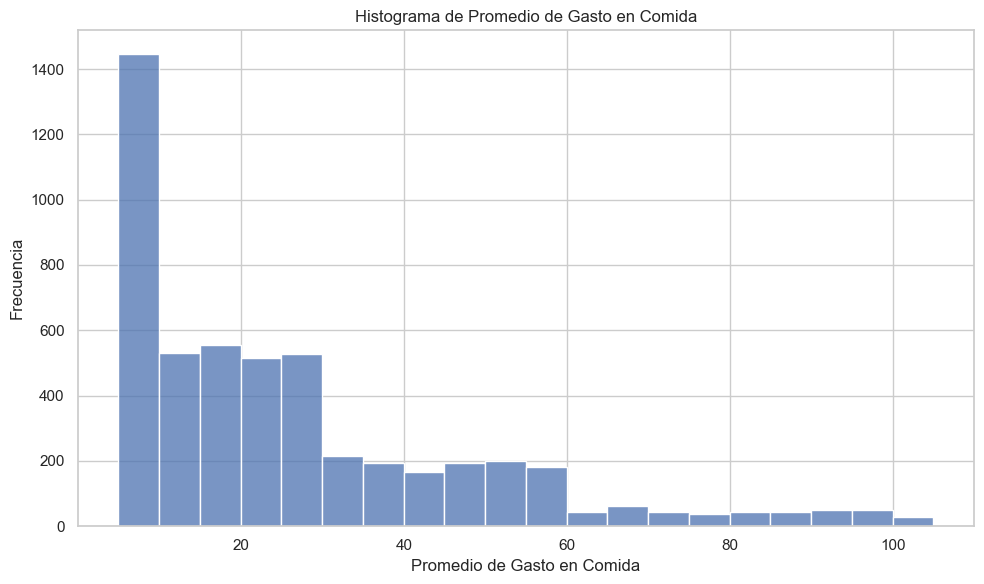

In [70]:
# Muestra un histograma del gasto promedio en comida de los usuarios.
# Este gráfico ayuda a visualizar la distribución del gasto y a identificar los rangos más frecuentes.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - users: El DataFrame que contiene los datos.
# - tipo='hist': Indica que se debe crear un histograma.
# - x='promedio_gasto_comida': La columna a analizar, que se mostrará en el eje X.
# - bins=20: Divide los datos en 20 rangos (barras) para el histograma.
# - palette=None: No aplica un esquema de colores.
# - title: Asigna un título descriptivo al gráfico.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
# - figsize: Define el tamaño del gráfico en pulgadas.
plot_custom(users, tipo='hist', x='promedio_gasto_comida', bins=20, palette=None, title='Histograma de Promedio de Gasto en Comida', xlabel='Promedio de Gasto en Comida', ylabel='Frecuencia', figsize=(10,6))

### Gráfico 8: Boxplot de Número de Reseñas de Negocios

Este boxplot muestra la dispersión y concentración en el número de reseñas recibidas por los restaurantes, facilitando la identificación de negocios con alta visibilidad y un alto potencial de viralización en campañas digitales.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette, hue=hue)


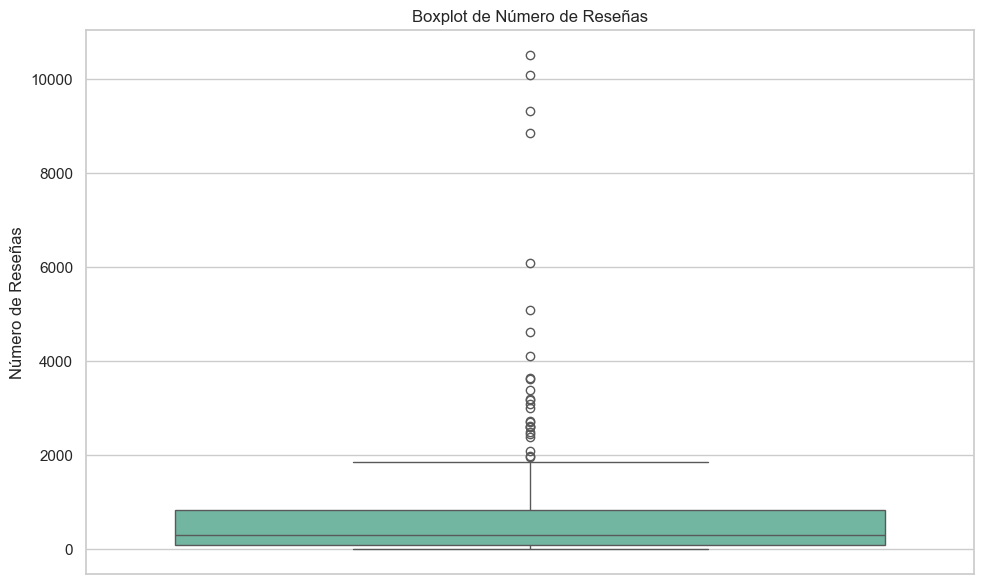

In [71]:
# Muestra un boxplot de la columna 'review_count'.
# Este gráfico es útil para visualizar la mediana, la dispersión y los valores atípicos del conteo de reseñas.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame que contiene los datos de los restaurantes.
# - tipo='box': Indica que se debe crear un diagrama de caja.
# - y='review_count': La columna a analizar, que se mostrará en el eje Y.
# - palette='Set2': Aplica un esquema de colores para el gráfico.
# - title: Asigna un título descriptivo al gráfico.
# - ylabel: Etiqueta el eje Y para mayor claridad.
plot_custom(rest, tipo='box', y='review_count', palette='Set2', title='Boxplot de Número de Reseñas', ylabel='Número de Reseñas')

### Gráfico 9: Histograma de Número de Reseñas de Negocios

El histograma de reseñas muestra la frecuencia de restaurantes según la cantidad de reseñas recibidas, ayudando a identificar negocios con alto nivel de engagement y con potencial para colaboraciones o promociones especiales.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:157: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=x, bins=bins, hue=hue, palette=palette)


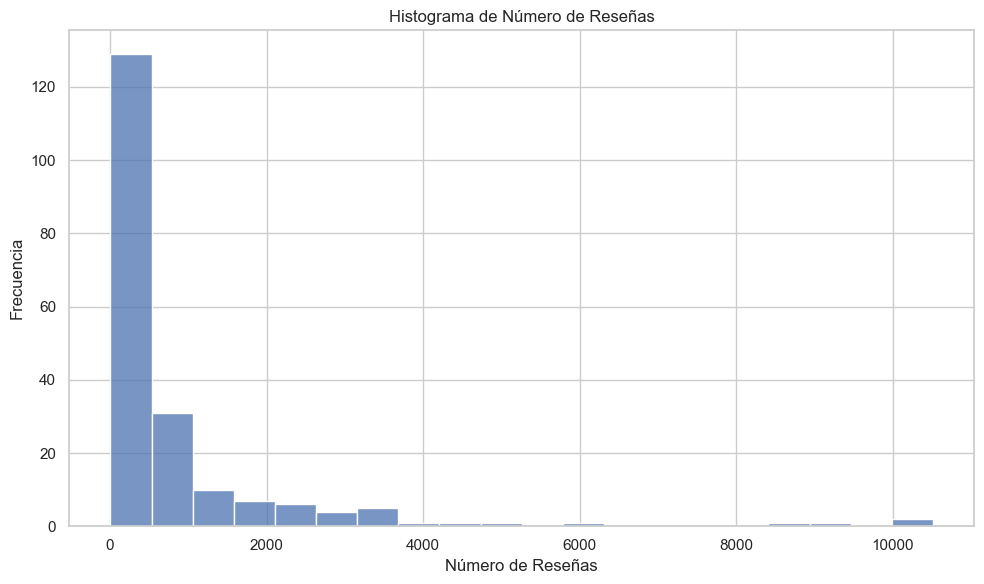

In [72]:
# Muestra un histograma del conteo de reseñas de los restaurantes.
# Este gráfico ayuda a visualizar la distribución de los datos y a identificar la frecuencia de los diferentes rangos de reseñas.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame de los restaurantes que contiene la variable a graficar.
# - tipo='hist': Le indica que el tipo de gráfico a generar es un histograma.
# - x='review_count': La columna que se usará para el eje X, que contiene el conteo de reseñas.
# - bins=20: Divide el rango de datos en 20 contenedores (barras) para una visualización más detallada.
# - palette='Set2': Aplica un esquema de colores predefinido al gráfico.
# - title: Asigna un título descriptivo para la clara identificación del gráfico.
# - xlabel: Etiqueta el eje X con una descripción clara.
# - ylabel: Etiqueta el eje Y con una descripción clara.
plot_custom(rest, tipo='hist', x='review_count', bins=20, palette='Set2', title='Histograma de Número de Reseñas', xlabel='Número de Reseñas', ylabel='Frecuencia')

### Gráfico 10: Boxplot de Rating de Negocios

El boxplot de ratings permite evaluar la calidad percibida de los restaurantes, mostrando la mediana, la dispersión y los valores atípicos en las valoraciones de los clientes. Esta información es clave para priorizar alianzas y campañas con los negocios mejor valorados.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette, hue=hue)


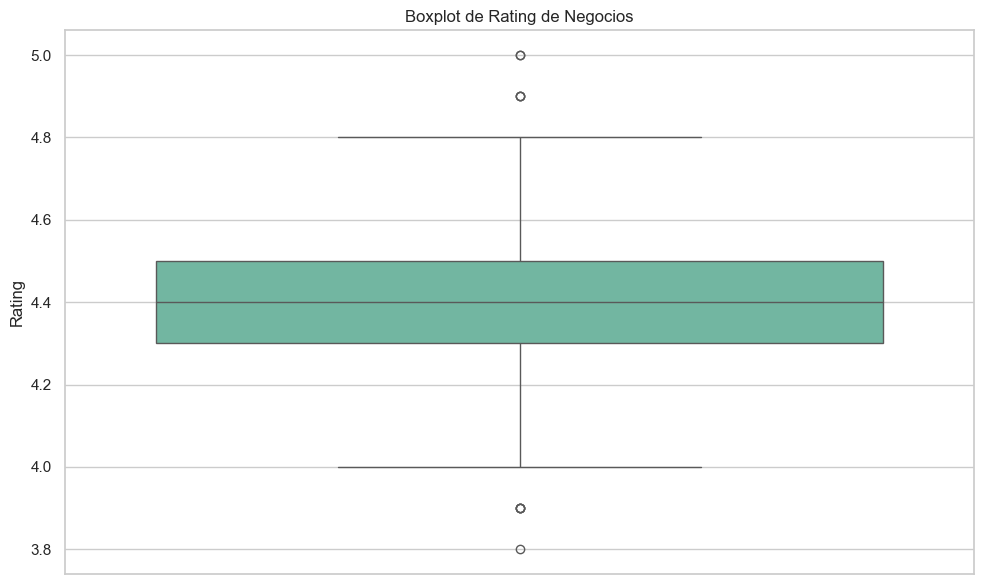

In [73]:
# Muestra un boxplot de la columna 'rating'.
# Este gráfico es útil para visualizar la mediana, la dispersión y los valores atípicos de los ratings de los negocios.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame que contiene los datos de los restaurantes.
# - tipo='box': Indica que se debe crear un diagrama de caja.
# - y='rating': La columna a analizar, que se mostrará en el eje Y.
# - palette='Set2': Aplica un esquema de colores para el gráfico.
# - title: Asigna un título descriptivo al gráfico.
# - ylabel: Etiqueta el eje Y para mayor claridad.
plot_custom(rest, tipo='box', y='rating', palette='Set2', title='Boxplot de Rating de Negocios', ylabel='Rating')

### Gráfico 11: Histograma de Rating de Negocios

El histograma de ratings muestra la distribución de las valoraciones de los restaurantes, permitiendo identificar la proporción de negocios con calificaciones sobresalientes y aquellos que podrían necesitar mejoras en la experiencia del cliente.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:157: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(data=df, x=x, bins=bins, hue=hue, palette=palette)


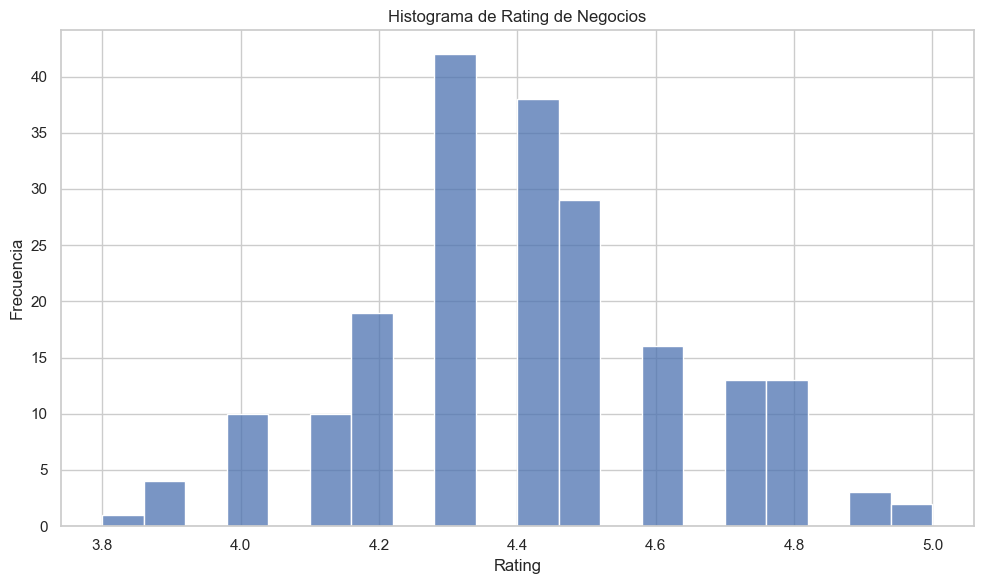

In [74]:
# Muestra un histograma de los ratings de los negocios.
# Este gráfico ayuda a visualizar la distribución de los ratings y a identificar los rangos más comunes.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame de los restaurantes que contiene la variable a graficar.
# - tipo='hist': Le indica que el tipo de gráfico a generar es un histograma.
# - x='rating': La columna que se usará para el eje X, que contiene el rating.
# - bins=20: Divide el rango de ratings en 20 contenedores (barras) para una visualización más detallada.
# - palette='Set2': Aplica un esquema de colores predefinido al gráfico.
# - title: Asigna un título descriptivo para la clara identificación del gráfico.
# - xlabel: Etiqueta el eje X con una descripción clara.
# - ylabel: Etiqueta el eje Y con una descripción clara.
plot_custom(rest, tipo='hist', x='rating', bins=20, palette='Set2', title='Histograma de Rating de Negocios', xlabel='Rating', ylabel='Frecuencia')

### Gráfico 12: Dispersión Rating vs Número de Reseñas

Este gráfico muestra la relación entre la popularidad (número de reseñas) y la calidad percibida (rating) de los restaurantes, ayudando a identificar negocios con alto engagement y excelente reputación, ideales para campañas de marketing de referencia.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:175: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=palette)


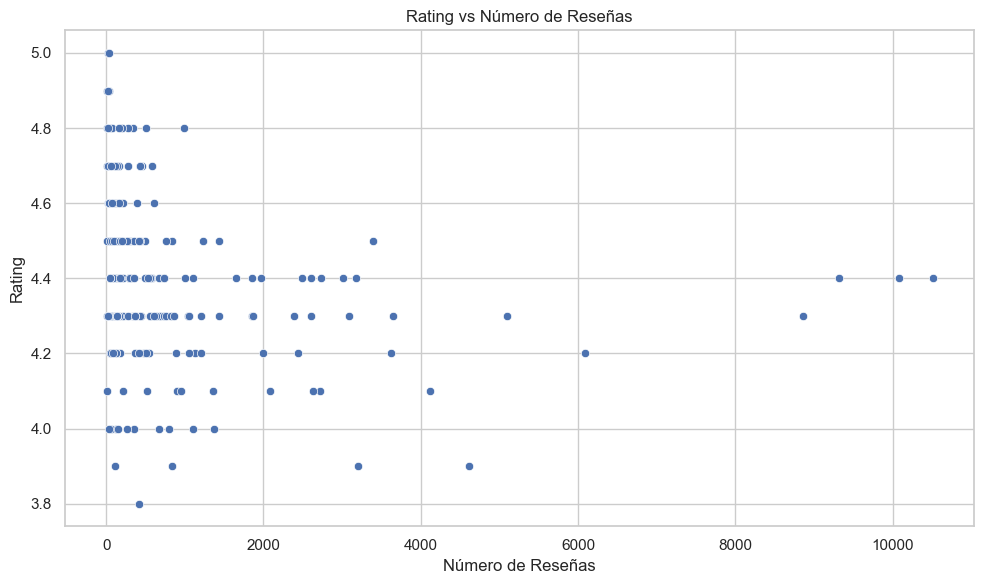

In [75]:
# Muestra un gráfico de dispersión para analizar la relación entre el número de reseñas y el rating.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame que contiene los datos de los restaurantes.
# - tipo='scatter': Le indica que se debe crear un gráfico de dispersión.
# - x='review_count': La columna que se usará para el eje X, que representa el número de reseñas.
# - y='rating': La columna que se usará para el eje Y, que representa el rating del negocio.
# - palette='Set2': Aplica un esquema de colores para el gráfico.
# - title: Asigna un título descriptivo al gráfico.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
plot_custom(rest, tipo='scatter', x='review_count', y='rating', palette='Set2', title='Rating vs Número de Reseñas', xlabel='Número de Reseñas', ylabel='Rating')

### Gráfico 13: Dispersión Promedio de Gasto en Comida vs Edad de Usuarios

Este gráfico explora la relación entre la edad de los usuarios y su promedio de gasto en comida, permitiendo identificar segmentos etarios con mayor poder adquisitivo o patrones de consumo diferenciados. Esta información es útil para diseñar campañas específicas basadas en el ciclo de vida del cliente.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:175: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.scatterplot(data=df, x=x, y=y, hue=hue, palette=palette)


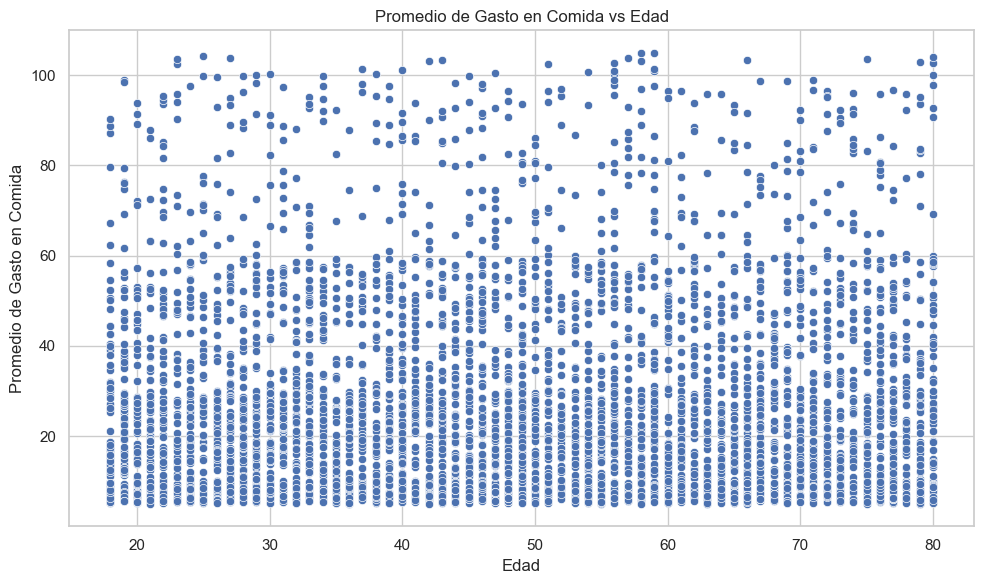

In [76]:
# Muestra un gráfico de dispersión para analizar la relación entre la edad y el gasto promedio en comida.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - users: El DataFrame que contiene los datos de los usuarios.
# - tipo='scatter': Le indica que se debe crear un gráfico de dispersión.
# - x='edad': La columna que se usará para el eje X.
# - y='promedio_gasto_comida': La columna que se usará para el eje Y.
# - palette='Set2': Aplica un esquema de colores al gráfico.
# - title: Asigna un título descriptivo.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
plot_custom(users, tipo='scatter', x='edad', y='promedio_gasto_comida', palette='Set2', title='Promedio de Gasto en Comida vs Edad', xlabel='Edad', ylabel='Promedio de Gasto en Comida')

### Gráfico 14: Boxplot de Rating por Nivel de Precio

Este gráfico permite comparar la calidad percibida de los restaurantes según su nivel de precio (`price_num`), ayudando a determinar si los negocios más caros realmente ofrecen una mejor experiencia o si existen oportunidades para destacar opciones económicas bien valoradas.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:166: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x=x, y=y, palette=palette, hue=hue)


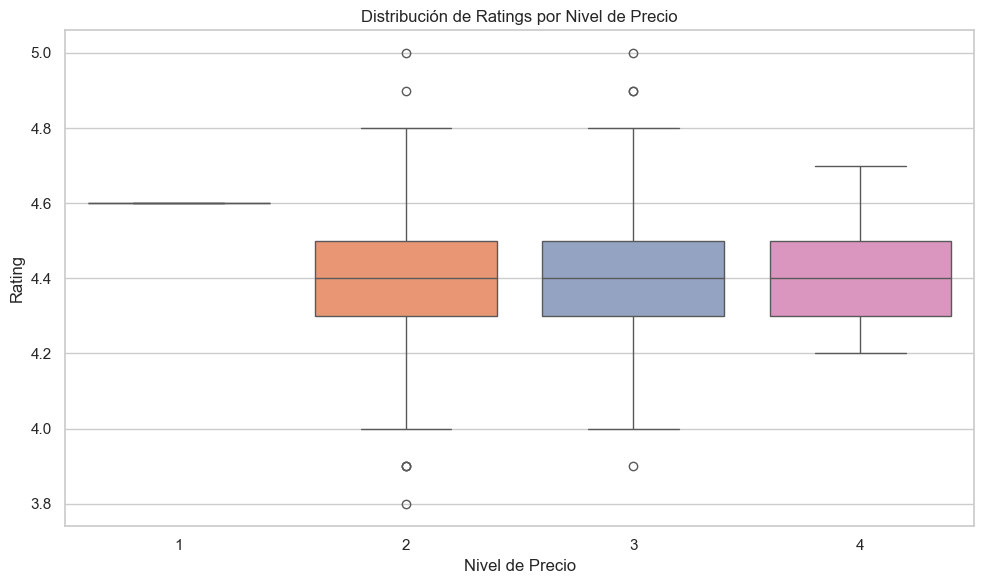

In [77]:
# Muestra un boxplot para analizar la distribución de los ratings según el nivel de precio del restaurante.

# Llama a la función personalizada 'plot_custom' para generar el gráfico.
# - rest: El DataFrame de los restaurantes que contiene los datos.
# - tipo='box': Le indica que se debe crear un diagrama de caja.
# - x='price_num': La columna que se usará para el eje X.
# - y='rating': La columna que se usará para el eje Y.
# - palette='Set2': Aplica un esquema de colores para el gráfico.
# - title: Asigna un título descriptivo.
# - xlabel: Etiqueta el eje X.
# - ylabel: Etiqueta el eje Y.
plot_custom(rest, tipo='box', x='price_num', y='rating', palette='Set2', title='Distribución de Ratings por Nivel de Precio', xlabel='Nivel de Precio', ylabel='Rating')

### Gráfico 15: Barras de Cantidad de Restaurantes por Alias (Top 10)

Este gráfico muestra los 10 alias más frecuentes entre los restaurantes, calculados a partir de las variables dummies (`alias_`) del dataset. Ayuda a identificar tendencias en la oferta y oportunidades para campañas o alianzas, basadas en la presencia de cada alias en la ciudad.


C:\Users\DODY DUEÑAS\AppData\Local\Temp\ipykernel_20888\377727284.py:23: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='cantidad_restaurantes', y='alias', data=alias_df, palette='viridis')


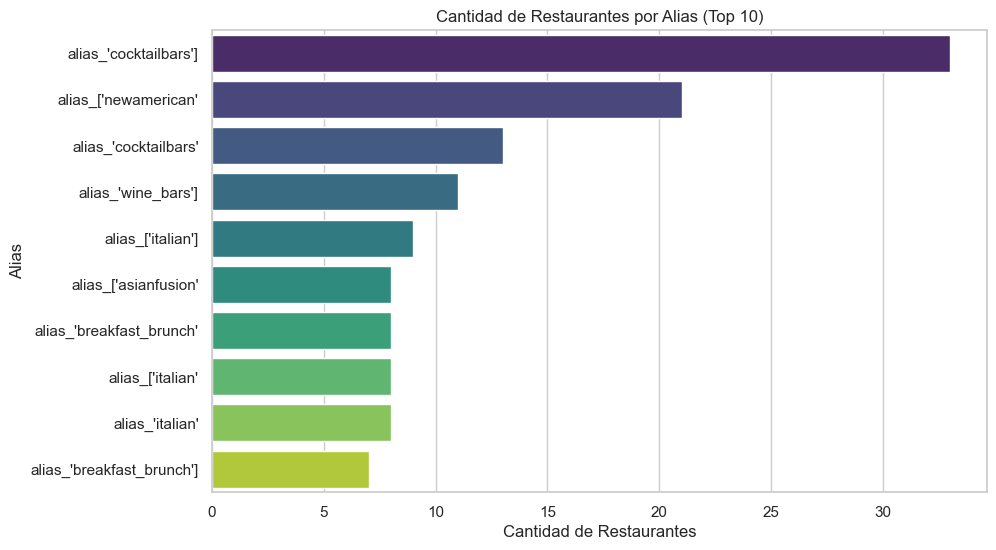

In [78]:
# Paso 1: Si la columna 'aliases' contiene listas o strings separadas, conviértela.
# Este ejemplo asume que la columna original se llama 'aliases'
# y que sus valores son listas de strings o strings separados por comas.
# Si tus datos están en un formato diferente, ajusta el código.
if isinstance(rest['aliases'].iloc[0], str):
    rest['aliases'] = rest['aliases'].str.split(', ')

# Paso 2: Usar get_dummies para crear las columnas para cada alias.
# Esto convierte cada alias en una columna con 1s y 0s.
alias_dummies = rest['aliases'].str.join('|').str.get_dummies().add_prefix('alias_')

# Paso 3: Unir las nuevas columnas al DataFrame principal.
rest = pd.concat([rest, alias_dummies], axis=1)

# Paso 4: Vuelve a ejecutar el código de visualización.
# Ahora que las columnas dummy están bien creadas, el gráfico debería mostrar los datos.
alias_cols = [col for col in rest.columns if col.startswith('alias_')]
alias_counts = rest[alias_cols].sum().sort_values(ascending=False).head(10)
alias_df = alias_counts.reset_index()
alias_df.columns = ['alias', 'cantidad_restaurantes']

plt.figure(figsize=(10, 6))
sns.barplot(x='cantidad_restaurantes', y='alias', data=alias_df, palette='viridis')
plt.title('Cantidad de Restaurantes por Alias (Top 10)')
plt.xlabel('Cantidad de Restaurantes')
plt.ylabel('Alias')
plt.show()

### Gráfico 16: Gráfico de Conteo de Preferencias Alimenticias

Este gráfico de conteo permite visualizar la frecuencia de cada preferencia alimenticia entre los usuarios, facilitando la identificación de tendencias de consumo y oportunidades para campañas segmentadas según los hábitos alimentarios.


c:\Users\DODY DUEÑAS\Desktop\ProyectoM1_Dody_Dueñas_Remache\Avances\Notebooks\mega_funcion.py:146: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=y, data=df, order=order, palette=palette, hue=hue)


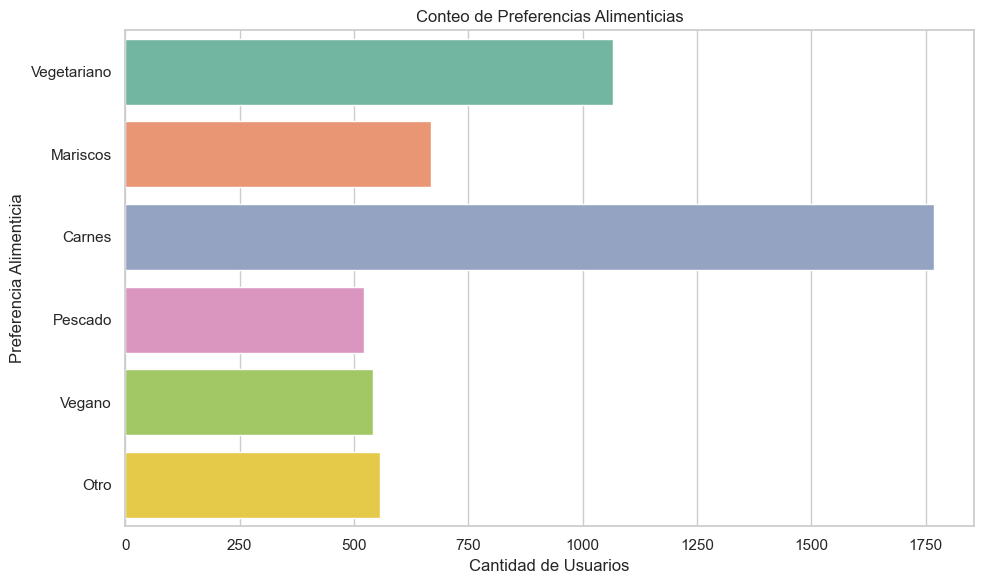

In [81]:
# Se llama a la función personalizada 'plot_custom' para generar el gráfico.
plot_custom(
    # El primer argumento es el DataFrame 'users' que contiene los datos.
    users, 
    
    # 'tipo='count'' le indica a la función que debe crear un gráfico de conteo.
    # Este gráfico es ideal para mostrar la frecuencia de valores categóricos.
    tipo='count', 
    
    # 'y='preferencias_alimenticias'' especifica la columna que se va a contar.
    # Como el gráfico es horizontal, esta columna se coloca en el eje Y (vertical).
    y='preferencias_alimenticias', 
    
    # 'palette='Set2'' define la paleta de colores a utilizar para las barras.
    palette='Set2', 
    
    # 'title' establece el título del gráfico.
    title='Conteo de Preferencias Alimenticias', 
    
    # 'xlabel' etiqueta el eje X (horizontal), que muestra la cantidad de usuarios.
    xlabel='Cantidad de Usuarios', 
    
    # 'ylabel' etiqueta el eje Y (vertical), que muestra las preferencias alimenticias.
    ylabel='Preferencia Alimenticia', 
    
    # 'horizontal=True' asegura que el gráfico sea de barras horizontales,
    # lo cual es útil cuando las etiquetas del eje Y son largas.
    horizontal=True
)

## Recomendación Personalizada de Restaurantes

Se ha implementado la función `recomendar_rest`, la cual permite sugerir restaurantes personalizados para cada usuario según sus características y preferencias. Esta función toma como argumentos el ID del usuario, los DataFrames de restaurantes y usuarios, y la cantidad de recomendaciones deseadas. Devuelve una lista de restaurantes recomendados, lo que facilita la personalización de campañas y mejora la experiencia del cliente.

**Ejemplo de uso:**
```python
recomendar_rest(9148064715, rest, users, 5)



In [82]:
# --- Preparación de datos ---

# Selecciona 10 IDs de usuario de forma aleatoria para las pruebas.
# .sample(10) toma una muestra de 10 elementos.
# random_state=42 asegura que la selección sea la misma cada vez que se ejecute el código, haciendo la prueba reproducible.
# .tolist() convierte la muestra en una lista.
ids_usuarios = users['id_persona'].sample(10, random_state=42).tolist()

# --- Ejecución del bucle ---

# Itera sobre cada uno de los IDs de usuario seleccionados.
for uid in ids_usuarios:
    
    # Imprime un encabezado para cada usuario para que la salida sea clara.
    print(f'Recomendaciones para usuario {uid}:')
    
    # Llama a la función 'recomendar_rest' con el ID del usuario, los DataFrames de restaurantes y usuarios, y el número de recomendaciones deseadas (5).
    print(recomendar_rest(uid, rest, users, 5))
    
    # Imprime una línea separadora para diferenciar las recomendaciones de cada usuario.
    print('-'*60)

Recomendaciones para usuario 1862274520:
--- Datos del usuario ---
Nombre: Susan Clarke
Preferencia alimenticia: Carnes
Estrato socioeconómico: Bajo
Gasto promedio comida: 6.51

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 2857228002:
--- Datos del usuario ---
Nombre: Robin Thomas
Preferencia alimenticia: Vegetariano
Estrato socioeconómico: Alto
Gasto promedio comida: 30.41

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 1768434922:
--- Datos del usuario ---
Nombre: Shannon Glass
Preferencia alimenticia: Carnes
Estrato socioeconómico: Medio
Gasto promedio comida: 24.52

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 1363534919:
--- Datos del usuario ---
Nombre: Sarah Johnson
Preferencia alimenticia: Vegetariano
Estrato socioeconómico: Medio
Gasto promedio comida: 18.5

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 1531125769:
--- Datos del usuario ---
Nombre: Robert Crawford
Preferencia alimenticia: Mariscos
Estrato socioeconómico: Medio
Gasto promedio comida: 11.24

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 2952887577:
--- Datos del usuario ---
Nombre: Aimee Chavez
Preferencia alimenticia: Carnes
Estrato socioeconómico: Muy Alto
Gasto promedio comida: 34.95

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 4236149857:
--- Datos del usuario ---
Nombre: John Roberts
Preferencia alimenticia: Carnes
Estrato socioeconómico: Muy Alto
Gasto promedio comida: 74.79

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 1599885633:
--- Datos del usuario ---
Nombre: Sharon Cortez
Preferencia alimenticia: Vegano
Estrato socioeconómico: Medio
Gasto promedio comida: 5.23

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 1921171206:
--- Datos del usuario ---
Nombre: Joshua Jimenez
Preferencia alimenticia: Otro
Estrato socioeconómico: Medio
Gasto promedio comida: 24.24

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------
Recomendaciones para usuario 2655760183:
--- Datos del usuario ---
Nombre: Amanda Flores
Preferencia alimenticia: Vegano
Estrato socioeconómico: Bajo
Gasto promedio comida: 7.5

Restaurantes recomendados:


,Nombre Restaurante,Dirección
0,girl-and-the-goat-chicago,809 W Randolph
1,the-purple-pig-chicago,444 N Michigan Ave
2,gretel-chicago,2833 W Armitage Ave
3,cindys-rooftop-chicago,12 S Michigan Ave
4,ciccio-mio-chicago-2,226 W Kinzie


None
------------------------------------------------------------


## Conclusión Ejecutiva y Recomendaciones

El análisis detallado de los datos de usuarios y restaurantes de Chicago, utilizando tanto variables numéricas y categóricas como alias (codificados como variables dummies), ha permitido identificar patrones claros y descubrir oportunidades estratégicas para la empresa:

- **Segmentación efectiva**: Se identifican grupos etarios y socioeconómicos bien definidos, lo que facilita el diseño de campañas personalizadas y maximiza el retorno de inversión en marketing.
- **Preferencias alimenticias**: Las tendencias en preferencias alimenticias abren oportunidades para establecer alianzas con restaurantes de nicho y crear campañas temáticas.
- **Restaurantes destacados**: Los restaurantes con altos ratings y un gran volumen de reseñas son aliados clave para promociones y programas de fidelización.
- **Gasto y valor**: La identificación de usuarios con alto gasto y sus patrones de comportamiento permite diseñar ofertas exclusivas y estrategias de retención.
- **Oferta gastronómica por alias**: El análisis de los alias más frecuentes (a partir de variables dummies) facilita la identificación de categorías de restaurantes predominantes, optimizando la segmentación de campañas y tendencias de oferta en la ciudad.
- **Oportunidades de mejora**: Restaurantes con baja valoración pero alto volumen de clientes tienen el potencial de mejorar a través de asesoría y campañas para mejorar su reputación.

**Recomendaciones:**
1. Implementar campañas segmentadas basadas en edad, estrato socioeconómico y preferencias alimenticias.
2. Potenciar alianzas con restaurantes mejor valorados y con mayor engagement.
3. Desarrollar programas de fidelización dirigidos a usuarios de alto gasto.
4. Aprovechar la información de alias para identificar oportunidades de posicionamiento y colaboraciones estratégicas.
5. Monitorear de manera continua los KPIs visualizados para ajustar la estrategia y anticipar cambios en el mercado.

Este informe proporciona una base sólida para la toma de decisiones estratégicas, con un enfoque orientado a resultados y al crecimiento sostenible en el sector gastronómico de Chicago, utilizando la estructura real de los datos disponibles.
